In [2]:
from sympy import *
from sympy.solvers.solveset import linsolve
init_printing()
import numpy as np
t, T, epsilon = symbols('t T epsilon')

def Fun_t(f):
    return Function(f)(t)

def Fun_T(f):
    return Function(f)(T)

In [10]:
R20,  R21, R22, Q20, Q21, Q22 = map(symbols,['R_2^{(0)}', 'R_2^{(1)}', 'R_2^{(2)}', 'Q_2^{(0)}', 'Q_2^{(1)}', 'Q_2^{(2)}'])
R30,  R31, R32, Q40, Q41, Q42 = map(symbols,['R_3^{(0)}', 'R_3^{(1)}', 'R_3^{(2)}', 'Q_4^{(0)}', 'Q_4^{(1)}', 'Q_4^{(2)}'])

Ca_er, Ca_cyt, H_er, H_cyt = map(symbols,['Ca_er', 'Ca_cyt', 'H_er', 'H_cyt'])
#R2 = R20 + epsilon*R21 + epsilon**2*R22 +Order(epsilon**3)
#R3 = R30 + epsilon*R31 + epsilon**2*R32 +Order(epsilon**3)

#Q2 = Q20 + epsilon*Q21 + epsilon**2*Q22 +Order(epsilon**3)
#Q4 = Q40 + epsilon*Q41 + epsilon**2*Q42 +Order(epsilon**3)

R2, R3, Q2, Q4 = symbols("R_2 R_3 Q_2 Q_4")

q1p, q1m, q20p, q20m, q3p, q3m, q40p, q40m, q5p, q5m =  map(symbols,['q_1^+', 'q_1^-', 'q_{20}^+', 'q_{20}^-', 'q_3^+', 'q_3^-', 'q_{40}^+', 'q_{40}^-', 'q_5^+', 'q_5^-'])
k1p, k2p, k3p, k1m, k2m, k3m = symbols('k_1^+ k_2^+ k_3^+ k_1^- k_2^- k_3^-')


In [11]:
dR2dt_expr =  q1p*(1-R2-R3) + q3m*Q4 + (q3p-q1m)*Q2-q3p*R2
dR3dt_expr = q3p*(R2-Q2) + q5m*(1-R2-R3)-q5p*R3+(q5p-q3m)*Q4
dQ2_dt_expr = +q20m*(R2-Q2)-q20p*Q2+epsilon*(q1p*(1-R2-R3)-q1m*Q2)
dQ4_dt_expr =-q40p*Q4+q40m*(R3-Q4) + epsilon*(q3p*(R2-Q2)-q3m*Q4)

system = [dR2dt_expr,dR3dt_expr,dQ2_dt_expr,dQ4_dt_expr]
system

In [13]:
steady_state = linsolve(system,(Q2,Q4,R2,R3))

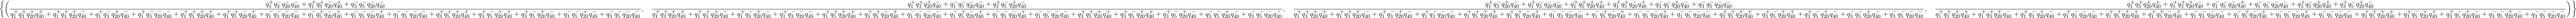

In [16]:
steady_state.subs(epsilon,0)

In [27]:
Q2s, Q4s, R2s, R3s = steady_state.args[0]

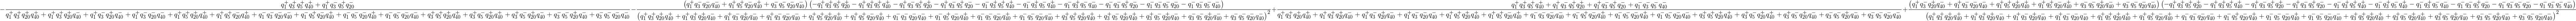

In [32]:
(R2s-Q2s).diff(epsilon).subs(epsilon,0)

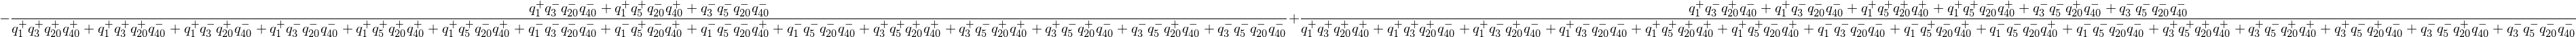

In [33]:
(R2s-Q2s).subs(epsilon,0)